In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
%cd "C:\Users\mcunningham\Documents\PythonProjects\CISC451\A2"

C:\Users\mcunningham\Documents\PythonProjects\CISC451\A2


In [2]:
df = pd.read_csv("data/C2T1_Train.csv")

In [3]:
df.shape

(90766, 50)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90766 entries, 0 to 90765
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id2             90766 non-null  int64 
 1   patient_nbr2              90766 non-null  int64 
 2   race                      90766 non-null  object
 3   gender                    90766 non-null  object
 4   age                       90766 non-null  object
 5   weight                    90766 non-null  object
 6   admission_type_id         90766 non-null  int64 
 7   discharge_disposition_id  90766 non-null  int64 
 8   admission_source_id       90766 non-null  int64 
 9   time_in_hospital          90766 non-null  int64 
 10  payer_code                90766 non-null  object
 11  medical_specialty         90766 non-null  object
 12  num_lab_procedures        90766 non-null  int64 
 13  num_procedures            90766 non-null  int64 
 14  num_medications       

In [5]:
df.head()

,encounter_id2,patient_nbr2,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,5283,48330653,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
1,8499,63555809,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
2,9441,42519137,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
3,20997,89868902,AfricanAmerican,Female,[40-50),?,1,1,7,9,...,No,Steady,No,No,No,No,No,No,Yes,>30
4,28515,82637321,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [6]:
df.groupby('readmitted').size()

readmitted
<30    10173
>30    31232
NO     49361
dtype: int64

Remove columns with no predictive value

In [7]:
df.drop(['encounter_id2', 'patient_nbr2'], axis=1, inplace=True)

In [8]:
df = df.replace('?',np.nan)

In [9]:
# let's make the output variable binary so we can approach the binary classification task first
df['readmitted']=pd.Series([0 if x=='NO' else 1 for x in df['readmitted']])

<AxesSubplot:xlabel='readmitted'>

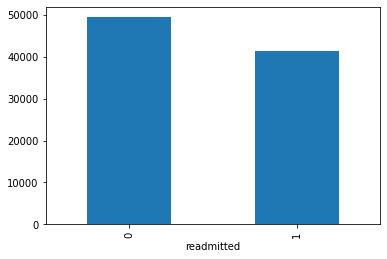

In [10]:
df.groupby('readmitted').size().plot(kind='bar')

Now we look at the unique values found in the different columns.


In [11]:
# for each column
for column in df.columns:
    # get a list of all unique values in the column
    unique = df[column].unique()
    # Print the column name and number on null values
    print(f"{column}:\n{df[column].isnull().sum()} Null values")
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(unique)<30:
        print(unique)
    else:
        print(f'{len(unique)} unique values')
    print('\n')

race:
2207 Null values
['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']


gender:
0 Null values
['Female' 'Male' 'Unknown/Invalid']


age:
0 Null values
['[80-90)' '[90-100)' '[40-50)' '[50-60)' '[60-70)' '[70-80)' '[20-30)'
 '[10-20)' '[30-40)' '[0-10)']


weight:
87840 Null values
[nan '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']


admission_type_id:
0 Null values
[2 3 1 6 4 5 8 7]


discharge_disposition_id:
0 Null values
[ 1  3  6  2  5 11  7 25 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]


admission_source_id:
0 Null values
[ 4  7  2  1  5  6 20  3 17  8  9 14 10 11 22 25 13]


time_in_hospital:
0 Null values
[13 12  1  9  3  7 10  4  5  2  6 11  8 14]


payer_code:
38730 Null values
[nan 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']


medical_specialty:
43674 Null values
72 unique values


num_lab_procedures:
0 Null values
118 unique values


num_procedures:
0 Nu

Combine weight categories near the extremes to reduce the number of categories without losing too much information

Text(0, 0.5, 'Count')

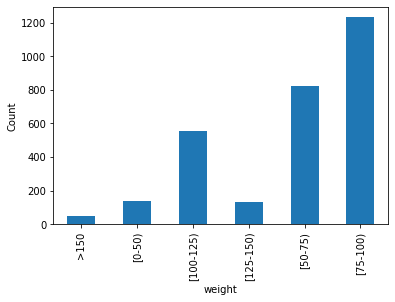

In [12]:
df['weight'] = pd.Series(['[0-50)' if val in ['[0-25)', '[25-50)'] else val 
                         for val in df['weight']], index=df.index)
df['weight'] = pd.Series(['>150' if val in ['[150-175)', '[175-200)', '>200'] else val 
                         for val in df['weight']], index=df.index)

df.groupby('weight').size().plot(kind='bar')
plt.ylabel('Count')

Do the same with the height

Text(0, 0.5, 'Count')

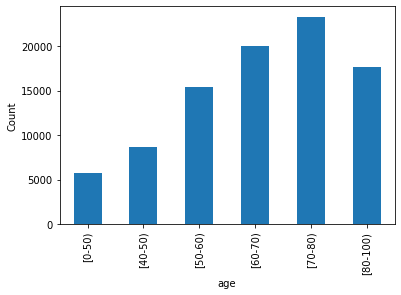

In [13]:
df['age'] = pd.Series(['[0-50)' if val in ['[0-10)', '[10-20)', '[20-30)', '[30-40)'] else val 
                         for val in df['age']], index=df.index)
df['age'] = pd.Series(['[80-100)' if val in ['[80-90)', '[90-100)'] else val 
                         for val in df['age']], index=df.index)

df.groupby('age').size().plot(kind='bar')
plt.ylabel('Count')

Now we split the discharge_disposition_id column into three distinct categories: "Home", "Death", and "Other"

Text(0, 0.5, 'Count')

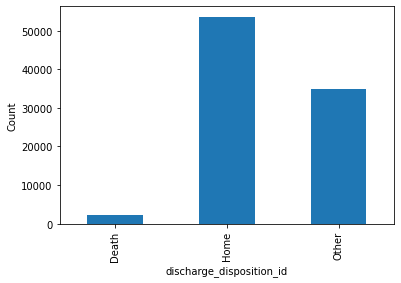

In [14]:
df['discharge_disposition_id'] = pd.Series(['Home' if val == 1 else 'Death' if val in [11,13,14,19,20,21] else 'Other' 
                                              for val in df['discharge_disposition_id']], index=df.index)
df.groupby('discharge_disposition_id').size().plot(kind='bar')
plt.ylabel('Count')

Combine id's corresponding to unknown values

Text(0, 0.5, 'Count')

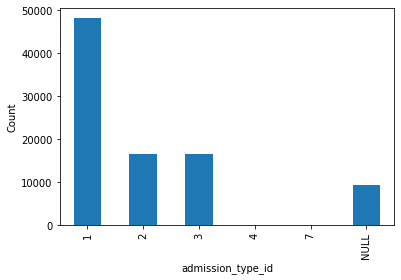

In [15]:
df['admission_type_id'] = pd.Series(['NULL' if val in [5, 6, 8] else val for val in df['admission_type_id']], index=df.index)
df.groupby('admission_type_id').size().plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

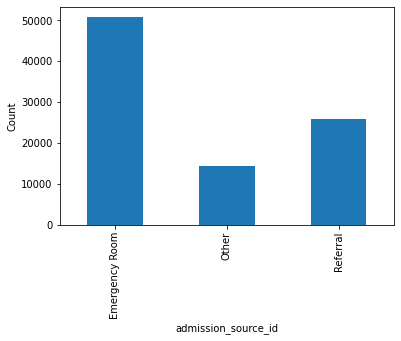

In [16]:
df['admission_source_id'] = pd.Series(['Referral' if val == 1 else 'Emergency Room' if val == 7 else 'Other' 
                                              for val in df['admission_source_id']], index=df.index)
df.groupby('admission_source_id').size().plot(kind='bar')
plt.ylabel('Count')

In [17]:
df.groupby('admission_source_id').size()

admission_source_id
Emergency Room    50731
Other             14284
Referral          25751
dtype: int64

In [18]:
categorical_columns = ['race', 'gender', 'weight',
       'max_glu_serum', 'A1Cresult', 'age', 'discharge_disposition_id', 
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'admission_type_id',
       'glyburide-metformin', 'glipizide-metformin', 'admission_source_id',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'medical_specialty']
df[categorical_columns].isnull().sum()

race                         2207
gender                          0
weight                      87840
max_glu_serum                   0
A1Cresult                       0
age                             0
discharge_disposition_id        0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
tolazamide                      0
insulin                         0
admission_type_id               0
glyburide-metformin             0
glipizide-metformin             0
admission_source_id             0
glimepiride-pioglitazone        0
metformin-rosiglitazone         0
metformin-piog

Fill all missing categorical data with "UNK" category

In [19]:
df['race'] = df['race'].fillna('UNK')
df['weight'] = df['weight'].fillna('UNK')
df['payer_code'] = df['payer_code'].fillna('UNK')
df['medical_specialty'] = df['medical_specialty'].fillna('UNK')

Investigate contents of medical_specialty column

In [20]:
df.groupby('medical_specialty').size().sort_values(ascending = False)

medical_specialty
UNK                                 43674
InternalMedicine                    13657
Family/GeneralPractice               6906
Emergency/Trauma                     6398
Cardiology                           4939
                                    ...  
Surgery-PlasticwithinHeadandNeck        1
Dermatology                             1
Proctology                              1
Pediatrics-InfectiousDiseases           1
Neurophysiology                         1
Length: 72, dtype: int64

Keep all categories with more than 500 occurances

In [21]:
cats_to_keep = [
    'UNK','InternalMedicine','Emergency/Trauma',
    'Family/GeneralPractice', 'Cardiology','Surgery-General',
    'Nephrology','Orthopedics', 'Orthopedics-Reconstructive',
    'Radiologist0', 'Pulmonology', 'Psychiatry', 'Urology',
    'Surgery-Cardiovascular/Thoracic', 'ObstetricsandGynecology']
# replace all specialties not in top 10 with 'Other' category
df.loc[~df.medical_specialty.isin(cats_to_keep),'medical_specialty'] = 'Other'
df.groupby('medical_specialty').size()

medical_specialty
Cardiology                          4939
Emergency/Trauma                    6398
Family/GeneralPractice              6906
InternalMedicine                   13657
Nephrology                          1457
ObstetricsandGynecology              619
Orthopedics                         1234
Orthopedics-Reconstructive          1137
Other                               5129
Psychiatry                           774
Pulmonology                          814
Surgery-Cardiovascular/Thoracic      623
Surgery-General                     2778
UNK                                43674
Urology                              627
dtype: int64

Prepare admission_type_id for one-hot encoding by convertring numerical data into strings

In [22]:
df['admission_type_id'] = df['admission_type_id'].astype('str')

Use get_dummies with drop_first to one-hot encode the categorical features while leaving one category out

In [23]:
categorical_df = pd.get_dummies(df[categorical_columns],drop_first = True)
categorical_df.head()

,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UNK,gender_Male,gender_Unknown/Invalid,weight_UNK,weight_[0-50),weight_[100-125),...,medical_specialty_ObstetricsandGynecology,medical_specialty_Orthopedics,medical_specialty_Orthopedics-Reconstructive,medical_specialty_Other,medical_specialty_Psychiatry,medical_specialty_Pulmonology,medical_specialty_Surgery-Cardiovascular/Thoracic,medical_specialty_Surgery-General,medical_specialty_UNK,medical_specialty_Urology
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
one_hot_columns = list(categorical_df.columns)
df = pd.concat([df,categorical_df], axis = 1)

In [25]:
df.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,medical_specialty_ObstetricsandGynecology,medical_specialty_Orthopedics,medical_specialty_Orthopedics-Reconstructive,medical_specialty_Other,medical_specialty_Psychiatry,medical_specialty_Pulmonology,medical_specialty_Surgery-Cardiovascular/Thoracic,medical_specialty_Surgery-General,medical_specialty_UNK,medical_specialty_Urology
0,Caucasian,Female,[80-100),UNK,2,Home,Other,13,UNK,UNK,...,0,0,0,0,0,0,0,0,1,0
1,Caucasian,Female,[80-100),UNK,3,Other,Other,12,UNK,InternalMedicine,...,0,0,0,0,0,0,0,0,0,0
2,Caucasian,Male,[40-50),UNK,1,Home,Emergency Room,1,UNK,UNK,...,0,0,0,0,0,0,0,0,1,0
3,AfricanAmerican,Female,[40-50),UNK,1,Home,Emergency Room,9,UNK,UNK,...,0,0,0,0,0,0,0,0,1,0
4,Caucasian,Male,[50-60),UNK,2,Home,Other,3,UNK,UNK,...,0,0,0,0,0,0,0,0,1,0


In [26]:
numerical_columns = ['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']
df[numerical_columns].isnull().sum()

time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
dtype: int64

## Diagnosis

Many unique values... 

### Primary Diagnosis
We seperate into ones that relate to diabetes (code starts with "250") and ones that don't.

### Secondary/Tertiary
Drop them

In [27]:
df['diag_1'] = pd.Series([1 if val.startswith('250') else 0 for val in df['diag_1'].astype('str')], index=df.index)

In [28]:
features = numerical_columns + one_hot_columns + ["diag_1"]
# features = [f for f in features if not f startswith('weight')]

In [29]:
df[features].shape

(90766, 106)

In [30]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.utils import resample
from make_confusion_matrix import make_confusion_matrix
from plot_roc_curve import plot_roc_curve
from validate_model import validate_model

Resample the data (using downsampling) so that we have an equal number of each outcome.

In [31]:
# Separate majority and minority classes
df_majority = df[df.readmitted==0]
df_minority = df[df.readmitted==1]
num_samples = df_minority.shape[0]
num_samples

41405

In [32]:
# Downsample majority class
df_majority_downsampled = resample(
                            df_majority,
                            replace=False,
                            n_samples=num_samples,
                            random_state=123)
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.readmitted.value_counts()

1    41405
0    41405
Name: readmitted, dtype: int64

In [33]:
x = df_downsampled[features]
y = df_downsampled['readmitted']
# X_train, X_test, y_train, y_test = train_test_split(
#      x, y, test_size=0.4, random_state=0)


In [34]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["Not Readmitted", "Readmitted"]

In [35]:
lrc = LogisticRegression()
knnc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

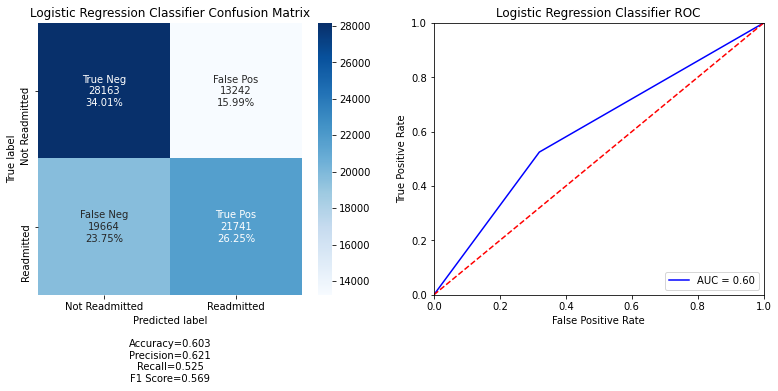

<Figure size 432x288 with 0 Axes>

In [36]:
validate_model(lrc, x, y, 'Logistic Regression Classifier', group_names=group_names, categories=categories)

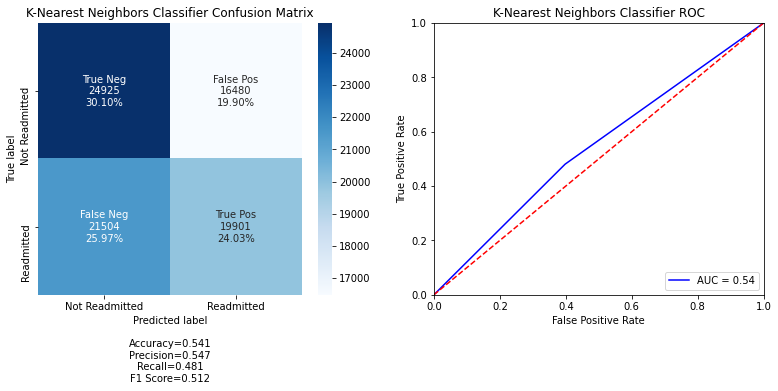

<Figure size 432x288 with 0 Axes>

In [37]:
validate_model(knnc, x, y, 'K-Nearest Neighbors Classifier', group_names=group_names, categories=categories)

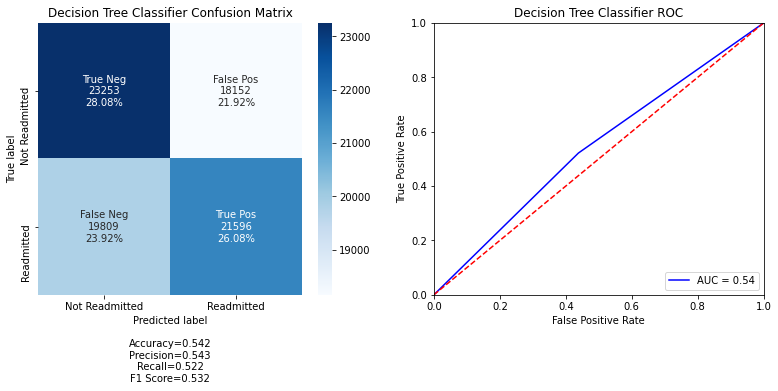

<Figure size 432x288 with 0 Axes>

In [38]:
validate_model(dtc, x, y, 'Decision Tree Classifier', group_names=group_names, categories=categories)

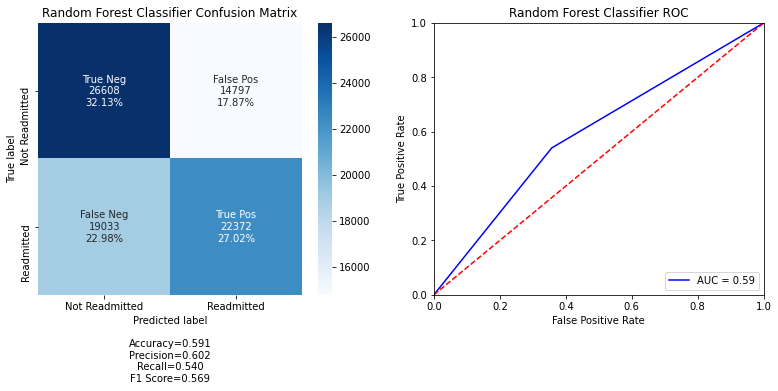

<Figure size 432x288 with 0 Axes>

In [39]:
validate_model(rfc, x, y, 'Random Forest Classifier', group_names=group_names, categories=categories)

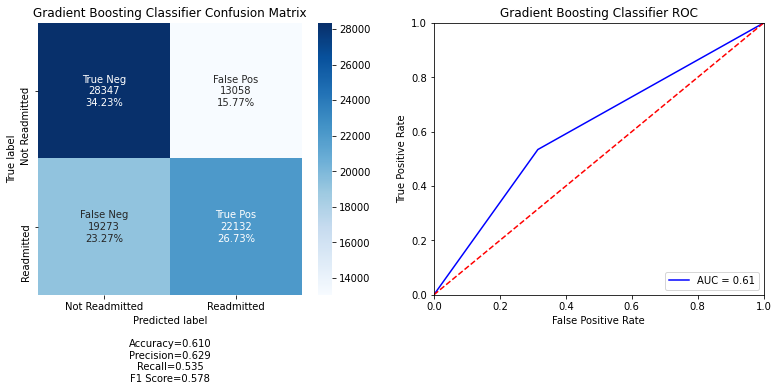

<Figure size 432x288 with 0 Axes>

In [40]:
validate_model(gbc, x, y, 'Gradient Boosting Classifier', group_names=group_names, categories=categories)

In [48]:
from sklearn.model_selection import GridSearchCV

In [51]:
selected_model = gbc = GradientBoostingClassifier(min_samples_split=500, min_samples_leaf=50, max_depth=8, max_features='sqrt', subsample=0.8, random_state=10)

n_trees_search = GridSearchCV(estimator=selected_model, param_grid={'n_estimators':range(20,101,10)}, scoring='roc_auc', n_jobs=4, iid=False, cv=5)
n_trees_search.fit(x, y)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8),
             iid=False, n_jobs=4,
             param_grid={'n_estimators': range(20, 100, 10)},
             scoring='roc_auc')

In [55]:
n_trees_search.cv_results_, n_trees_search.best_params_, n_trees_search.best_score_

({'mean_fit_time': array([ 2.86652946,  4.58035755,  5.30705657,  6.39370208,  7.55567803,
          9.19731927, 10.8461833 , 12.95145817]),
  'std_fit_time': array([0.0903127 , 0.17190796, 0.47386619, 0.10142471, 0.09667094,
         0.49830752, 0.52279216, 0.98954986]),
  'mean_score_time': array([0.09713993, 0.12287226, 0.10890913, 0.12227259, 0.14002609,
         0.18930731, 0.16894784, 0.1855124 ]),
  'std_score_time': array([0.00835777, 0.02150606, 0.00965739, 0.00566451, 0.00494992,
         0.05301972, 0.01134686, 0.06254996]),
  'param_n_estimators': masked_array(data=[20, 30, 40, 50, 60, 70, 80, 90],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 20},
   {'n_estimators': 30},
   {'n_estimators': 40},
   {'n_estimators': 50},
   {'n_estimators': 60},
   {'n_estimators': 70},
   {'n_estimators': 80},
   {'n_estimators': 90}],
  'split0_test_score': array([0.4984923

In [56]:
refined_gbc = GradientBoostingClassifier(min_samples_leaf=50, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10)
depth_split_grid = {'max_depth': range(5,16,2), 'min_samples_split': range(200,1001,200)}
depth_split_test = GridSearchCV(estimator=refined_gbc , param_grid=depth_split_grid, scoring='roc_auc' ,n_jobs=-1, iid=False, cv=5)
depth_split_test.fit(x, y)
depth_split_test.cv_results_, depth_split_test.best_params_, depth_split_test.best_score_

NameError: name 'param_test2' is not defined

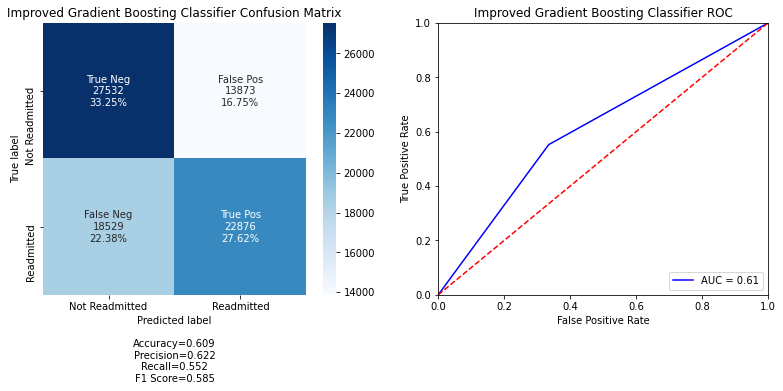

<Figure size 432x288 with 0 Axes>

In [44]:
validate_model(selected_model, x, y, 'Improved Gradient Boosting Classifier', group_names=group_names, categories=categories)